In [104]:
import pandas as pd
import numpy as np
import missingno as msno 
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',100)

In [105]:
data_train = pd.read_pickle('/home/ef/Documents/Diplomado/data/data_train_gen4.pkl')
data_test = pd.read_pickle('/home/ef/Documents/Diplomado/data/data_test_gen4.pkl')

In [106]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Timestamp                                        44 non-null     object 
 1   Edad                                             44 non-null     int64  
 2   Talla de Zapato                                  44 non-null     float64
 3   Altura en centímetros                            44 non-null     float64
 4   Peso en KG                                       44 non-null     int64  
 5   Signo zodiacal                                   44 non-null     object 
 6   Promedio de licenciatura con números entre 0-10  44 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.5+ KB


In [107]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Timestamp                                        11 non-null     object 
 1   Edad                                             11 non-null     int64  
 2   Talla de Zapato                                  11 non-null     float64
 3   Altura en centímetros                            11 non-null     float64
 4   Peso en KG                                       11 non-null     int64  
 5   Signo zodiacal                                   11 non-null     object 
 6   Promedio de licenciatura con números entre 0-10  11 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 744.0+ bytes


In [108]:
#Transformar a formato de fecha
data_train['Timestamp']=pd.to_datetime(data_train['Timestamp'])
data_test['Timestamp']=pd.to_datetime(data_test['Timestamp'])
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Timestamp                                        44 non-null     datetime64[ns]
 1   Edad                                             44 non-null     int64         
 2   Talla de Zapato                                  44 non-null     float64       
 3   Altura en centímetros                            44 non-null     float64       
 4   Peso en KG                                       44 non-null     int64         
 5   Signo zodiacal                                   44 non-null     object        
 6   Promedio de licenciatura con números entre 0-10  44 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 2.5+ KB


In [109]:
#CALIDAD DE DATOS

In [110]:
data_train.columns

Index(['Timestamp', 'Edad', 'Talla de Zapato ', 'Altura en centímetros',
       'Peso en KG', 'Signo zodiacal ',
       'Promedio de licenciatura con números entre 0-10'],
      dtype='object')

In [111]:
num = ['Edad', 'Talla de Zapato ', 'Altura en centímetros', 'Peso en KG', 'Promedio de licenciatura con números entre 0-10']

In [112]:
1-data_train.isnull().sum()/data_train.shape[0] 

Timestamp                                          1.0
Edad                                               1.0
Talla de Zapato                                    1.0
Altura en centímetros                              1.0
Peso en KG                                         1.0
Signo zodiacal                                     1.0
Promedio de licenciatura con números entre 0-10    1.0
dtype: float64

<AxesSubplot:>

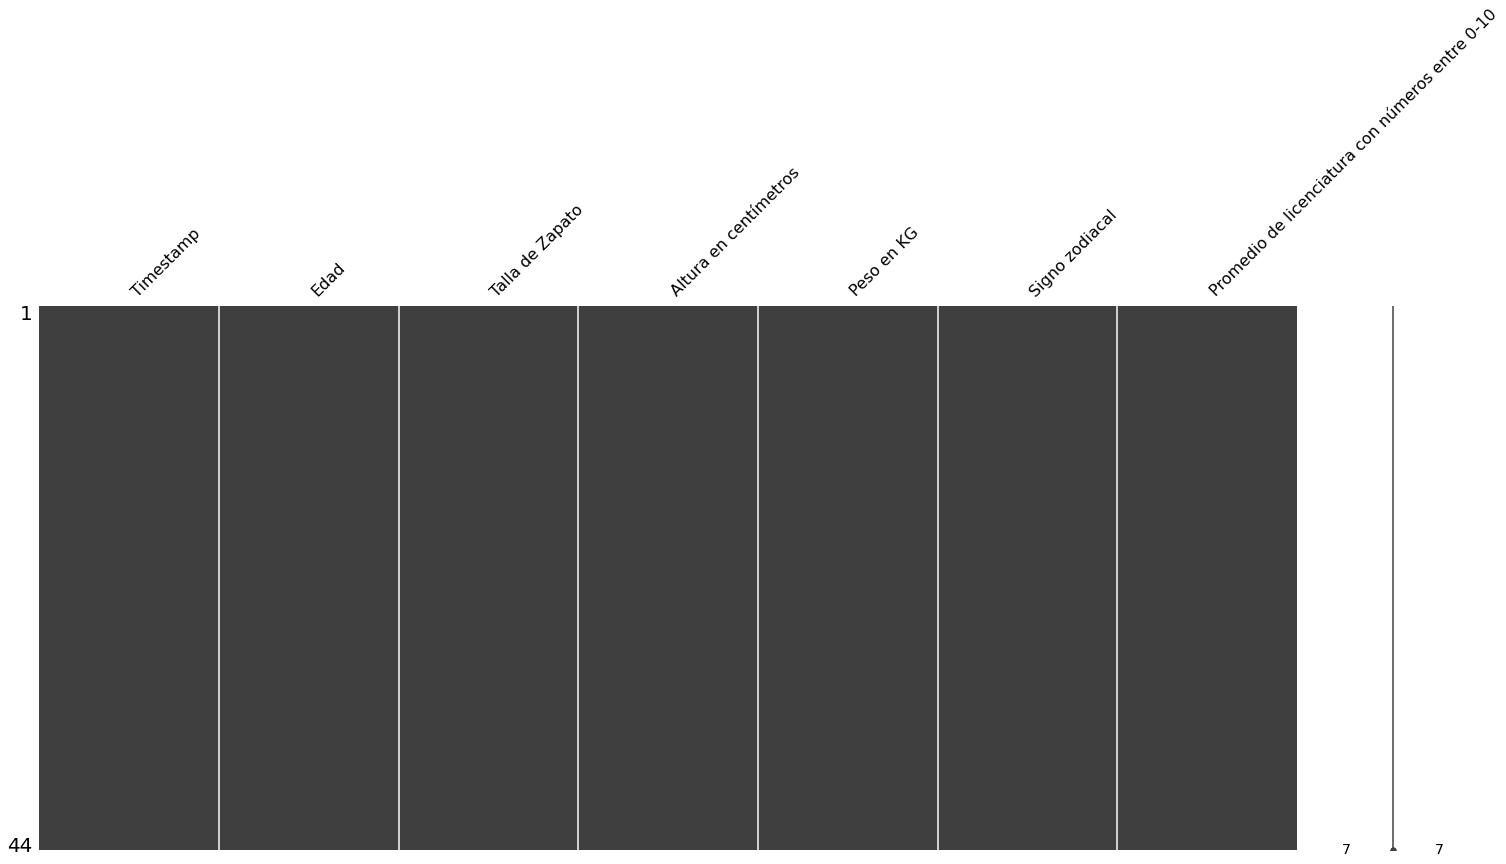

In [113]:
msno.matrix(data_train)
#NO hay datos nulos (yeah!)

In [114]:
data_train.describe()
#Con excepción de la altura en cm (difícilmente una persona de 1cm pudo haber contestado la encuesta)
#no parece haber outliers, los valores lejanos podrían repetirse en una nueva muestra

,Edad,Talla de Zapato,Altura en centímetros,Peso en KG,Promedio de licenciatura con números entre 0-10
count,44.000000,44.000000,44.000000,44.000000,44.000000
mean,28.977273,26.090909,153.586136,73.750000,8.527500
std,6.196355,1.968569,49.436753,15.104481,0.622045
min,23.000000,23.000000,1.630000,44.000000,7.340000
25%,25.000000,24.375000,157.750000,60.750000,8.000000
50%,26.000000,26.750000,169.000000,70.000000,8.535000
75%,31.250000,27.500000,175.000000,85.250000,9.005000
max,46.000000,30.000000,184.000000,110.000000,10.000000


In [115]:
data_test.describe()

,Edad,Talla de Zapato,Altura en centímetros,Peso en KG,Promedio de licenciatura con números entre 0-10
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,27.727273,26.136364,137.042727,67.909091,8.299091
std,4.337993,2.259324,67.421228,8.870790,0.561185
min,21.000000,23.000000,1.730000,52.000000,7.000000
25%,25.500000,24.250000,157.000000,64.000000,8.010000
50%,27.000000,27.000000,163.000000,66.000000,8.270000
75%,30.500000,27.500000,167.500000,73.500000,8.750000
max,34.000000,30.000000,183.000000,82.000000,9.000000


In [116]:
#Se asume (sin mucho riesgo) que las alturas de 1-3cm en realidad deberían ser metros, se ajusta la variable
Altura = []
for x in data_train['Altura en centímetros']:
    if x < 3:
        Altura.append(x*100)
    else:
        Altura.append(x)
data_train['Altura en centímetros'] = Altura
data_train.describe()

,Edad,Talla de Zapato,Altura en centímetros,Peso en KG,Promedio de licenciatura con números entre 0-10
count,44.000000,44.000000,44.000000,44.000000,44.000000
mean,28.977273,26.090909,168.863636,73.750000,8.527500
std,6.196355,1.968569,9.242447,15.104481,0.622045
min,23.000000,23.000000,150.000000,44.000000,7.340000
25%,25.000000,24.375000,160.000000,60.750000,8.000000
50%,26.000000,26.750000,169.500000,70.000000,8.535000
75%,31.250000,27.500000,175.000000,85.250000,9.005000
max,46.000000,30.000000,184.000000,110.000000,10.000000


In [117]:
Altura = []
for x in data_test['Altura en centímetros']:
    if x < 3:
        Altura.append(x*100)
    else:
        Altura.append(x)
data_test['Altura en centímetros'] = Altura
data_test.describe()

,Edad,Talla de Zapato,Altura en centímetros,Peso en KG,Promedio de licenciatura con números entre 0-10
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,27.727273,26.136364,168.272727,67.909091,8.299091
std,4.337993,2.259324,8.776000,8.870790,0.561185
min,21.000000,23.000000,156.000000,52.000000,7.000000
25%,25.500000,24.250000,163.000000,64.000000,8.010000
50%,27.000000,27.000000,165.000000,66.000000,8.270000
75%,30.500000,27.500000,173.500000,73.500000,8.750000
max,34.000000,30.000000,183.000000,82.000000,9.000000


In [118]:
#Es importante escalar las variables dado el distinto rango en donde se encuentran
for col in num:
    data_train[f'{col}_std'] = (data_train[col]-data_train[col].mean())/data_train[col].std()
    
var_std=[col for col in data_train.columns if col.endswith('std')]
data_train[var_std].describe([i/100 for i in range(10,100,10)]).round(4)

,Edad_std,Talla de Zapato _std,Altura en centímetros_std,Peso en KG_std,Promedio de licenciatura con números entre 0-10_std
count,44.0000,44.0000,44.0000,44.0000,44.0000
mean,0.0000,0.0000,-0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000
min,-0.9646,-1.5701,-2.0410,-1.9696,-1.9090
10%,-0.9162,-1.3161,-1.3918,-0.9765,-1.1695
20%,-0.7064,-1.0621,-1.0023,-0.9103,-0.8480
30%,-0.6419,-0.8082,-0.4397,-0.5925,-0.8480
40%,-0.4805,-0.4526,-0.1800,-0.3807,-0.5072
50%,-0.4805,0.3348,0.0689,-0.2483,0.0121
60%,-0.1900,0.4618,0.4043,0.0828,0.2741


In [72]:
#COMPARAR DISTRIBUCIÓN TRAIN VS TEST

In [120]:
#La escala que se utiliza para el conjunto de entrenamiento se tiene que usar para el de test
for col in num:
    data_test[f'{col}_std']=(data_test[col]-data_train[col].mean())/data_train[col].std()
    
var_std=[col for col in data_test.columns if col.endswith('std')]
data_test[var_std].describe([i/100 for i in range(10,100,10)]).round(4)

,Edad_std,Talla de Zapato _std,Altura en centímetros_std,Peso en KG_std,Promedio de licenciatura con números entre 0-10_std
count,11.0000,11.0000,11.0000,11.0000,11.0000
mean,-0.2017,0.0231,-0.0639,-0.3867,-0.3672
std,0.7001,1.1477,0.9495,0.5873,0.9022
min,-1.2874,-1.5701,-1.3918,-1.4400,-2.4556
10%,-0.9646,-1.5701,-1.1754,-1.1089,-0.8480
20%,-0.6419,-1.0621,-0.6344,-0.7117,-0.8480
30%,-0.4805,-0.8082,-0.6344,-0.5793,-0.8159
40%,-0.4805,-0.0462,-0.4180,-0.5793,-0.5265
50%,-0.3191,0.4618,-0.4180,-0.5131,-0.4140
60%,-0.1577,0.4618,0.1230,-0.0497,-0.0442


In [121]:
#La diferencia de la media y la desv est no es relevante, muy probablemente el conjunto de test y entrenamiento tienenl a misma distribución
data_train[var_std].describe()-data_test[var_std].describe()

,Edad_std,Talla de Zapato _std,Altura en centímetros_std,Peso en KG_std,Promedio de licenciatura con números entre 0-10_std
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,0.201731,-0.023090,0.063934,0.386700,0.367191
std,0.299912,-0.147699,0.050468,0.412705,0.097838
min,0.322770,0.000000,-0.649179,-0.529644,0.546584
25%,-0.080693,0.063498,-0.324589,-0.215168,-0.016076
50%,-0.161385,-0.126996,0.486884,0.264822,0.426014
75%,0.121039,0.000000,0.162295,0.777915,0.409938
max,1.936622,0.000000,0.108196,1.853755,1.607600


In [124]:
#Pero en cuanto a la etiqueta "signo zodiacal", la distribución es distinta entre train vs test
data_train['Signo zodiacal '].value_counts()

cancer         8
geminis        8
sagitario      5
capricornio    4
acuario        4
escorpio       3
tauro          3
libra          2
picis          2
virgo          2
leo            2
aries          1
Name: Signo zodiacal , dtype: int64

In [125]:
data_test['Signo zodiacal '].value_counts()

picis        2
sagitario    2
geminis      2
cancer       1
escorpio     1
acuario      1
libra        1
tauro        1
Name: Signo zodiacal , dtype: int64